In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import time
import json
import os
from pprint import pprint
import random
from twitter_config import consumer_key, consumer_key_secret, access_token, access_token_secret
import datetime

now = datetime.datetime.now()
nowDay = f"({now.month}/{now.day}/{now.year})"

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
def sentiment_analysis(target_user):

    # Create a counter for viewing every 100 tweets
    counter = 0

    # Loop through 100 tweets
    tweetsPer = 100
    pages = int(tweetsPer / 20)
    for x in range(1, pages+1):

        # Get all tweets from target user
        public_tweets = api.user_timeline(target_user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            text = tweet['text']
            
            # Store all tweet times into the array
            results = analyzer.polarity_scores(text)
            tweet_times.append(tweet["created_at"])
            tweet_texts.append(text)
            tweet_pos.append(results['pos'])
            tweet_neg.append(results['neg'])
            tweet_neu.append(results['neu'])
            tweet_com.append(results['compound'])
            target_list.append(target_user)
            
            

            counter += 1

            # Print tweets for preview
            if counter % 100 == 0:
                print(tweet["created_at"])
    
    


In [7]:
    # Create array to record all date-times of tweets

newsOutlets = ['BBC', 'CBSNews', 'CNN', 'FoxNews', 'NYTimes']    

    
    tweet_times = []
    tweet_texts = []
    tweet_pos = []
    tweet_neg = []
    tweet_neu = []
    tweet_com= []
    target_list= []

    count = 0
    
for channel in newsOutlets:
        count = count+1
        sentiment_analysis(channel)



Tue Jun 19 13:38:02 +0000 2018
Mon Jun 25 10:59:56 +0000 2018
Mon Jun 25 12:27:25 +0000 2018
Mon Jun 25 19:00:41 +0000 2018
Mon Jun 25 10:29:05 +0000 2018


In [9]:
# Length of Lists
print(f'Tweets = {len(tweet_texts)}')
print(f'Times = {len(tweet_times)}')
print(f'Compound = {len(tweet_com)}')
print(f'Positive = {len(tweet_pos)}')
print(f'Negative = {len(tweet_neg)}')
print(f'Neutral = {len(tweet_neu)}')

Tweets = 500
Times = 500
Compound = 500
Positive = 500
Negative = 500
Neutral = 500


In [11]:
# Organize lists into dataframe
tweetDF = pd.DataFrame({
    'Tweet' : tweet_texts,
    'Date' : tweet_times,
    'Compound' : tweet_com,
    'Positive' : tweet_pos,
    'Negitive' : tweet_neg,
    'Neutral' : tweet_neu,
    'Outlet': target_list    
})


tweetDF.head(5)


,Compound,Date,Negitive,Neutral,Outlet,Positive,Tweet
0,0.3612,Mon Jun 25 18:03:04 +0000 2018,0.000,0.815,BBC,0.185,✨ These women are ditching their straighteners...
1,0.0000,Mon Jun 25 17:31:08 +0000 2018,0.000,1.000,BBC,0.000,Two teams of junior doctors from teaching hosp...
2,0.2732,Mon Jun 25 16:02:03 +0000 2018,0.000,0.769,BBC,0.231,"🙌😂 Well, that escalated quickly.\n#HearHer #Li..."
3,-0.5524,Mon Jun 25 15:01:34 +0000 2018,0.229,0.771,BBC,0.000,RT @BBCTwo: SO much tension between Louis and ...
4,0.3182,Mon Jun 25 14:57:32 +0000 2018,0.000,0.839,BBC,0.161,RT @BBCTwo: brb just gonna pop inside for some...


In [13]:
# Save Dateframe as CSV
file_name = os.path.join('CSV_output', 'Tweet_CSV.csv')
tweetDF.to_csv(file_name, sep='\t', encoding='utf-8')



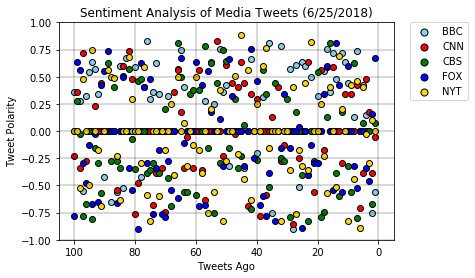

In [30]:
# Scatter Plot
# Filter columns to data we want for scatter plot
redDF = tweetDF.filter(items = ['Date', 'Compound', 'Outlet'])
redDF.head()

# df.loc[df['column_name'] == some_value]

# Filter rows to create a DF for each newsOutlet
BBC_DF = redDF.loc[tweetDF['Outlet'] == 'BBC']
CNN_DF = redDF.loc[tweetDF['Outlet'] == 'CNN']
CBS_DF = redDF.loc[tweetDF['Outlet'] == 'CBSNews']
FOX_DF = redDF.loc[tweetDF['Outlet'] == 'FoxNews']
NYT_DF = redDF.loc[tweetDF['Outlet'] == 'NYTimes']


# x values for scatter
x = np.arange(100, 0,-1)

# for y in ysets:
#     plt.scatter(x, y, color=next(colors))
BBC = plt.scatter(x, BBC_DF['Compound'], c = 'skyblue', edgecolors = 'black')
CNN = plt.scatter(x, CNN_DF['Compound'], c = 'red', edgecolors = 'black')
CBS = plt.scatter(x, CBS_DF['Compound'], c = 'green', edgecolors = 'black')
FOX = plt.scatter(x, FOX_DF['Compound'], c = 'blue', edgecolors = 'black')
NYT = plt.scatter(x, NYT_DF['Compound'], c = 'gold', edgecolors = 'black')

lgnd = plt.legend((BBC, CNN, CBS, FOX, NYT),
                 ('BBC', 'CNN', 'CBS', 'FOX', 'NYT'),
                 bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
lgnd.legendHandles[3]._sizes = [50]
lgnd.legendHandles[4]._sizes = [50]


plt.title(f"Sentiment Analysis of Media Tweets {nowDay}")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

xmin = -5
xlim = 105
ymin = -1
ylim = 1
plt.xlim(xlim,xmin)
plt.ylim(ymin,ylim)

horLines = np.arange(ymin,ylim+.25, .25)
verLines = np.arange(xlim-5,xmin, -20)
plt.hlines(horLines, xmin, xlim, alpha=0.2)
plt.vlines(verLines, ymin, ylim, alpha=0.2)

# Ru = plt.scatter(x_rur, y_rur, s=z_rur, alpha=0.5, c='gold', edgecolors="black", linewidth = 2)
# Ur = plt.scatter(x_urb, y_urb, s=z_urb, alpha=0.5, c='lightcoral', edgecolors="black", linewidth = 2)
# Su = plt.scatter(x_sub, y_sub, s=z_sub, alpha=0.5, c='skyblue', edgecolors="black", linewidth = 2)

# lgnd = plt.legend((Ru, Ur, Su),
#           ('Rural', 'Urban', 'Suburban'))

# lgnd.legendHandles[0]._sizes = [50]
# lgnd.legendHandles[1]._sizes = [50]
# lgnd.legendHandles[2]._sizes = [50]


outputfile = os.path.join('Images', 'Scatter.png')
plt.savefig(outputfile)

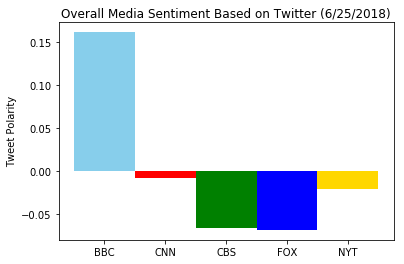

In [135]:
# Bar Plot

BBC_mean = BBC_DF['Compound'].mean()
CNN_mean = CNN_DF['Compound'].mean()
CBS_mean = CBS_DF['Compound'].mean()
FOX_mean = FOX_DF['Compound'].mean()
NYT_mean = NYT_DF['Compound'].mean()

scoreDict = {
    'BBC': BBC_mean,
    'CNN': CNN_mean,
    'CBS': CBS_mean,
    'FOX': FOX_mean,
    'NYT': NYT_mean
}

colors = ['skyblue', 'red', 'green', 'blue', 'gold']

fig = plt.bar(range(len(scoreDict)), list(scoreDict.values()), align='center', color = colors, width =1)
fig = plt.xticks(range(len(scoreDict)), list(scoreDict.keys()))

fig = plt.title(f"Overall Media Sentiment Based on Twitter {nowDay}")
fig = plt.ylabel("Tweet Polarity")

outputfile = os.path.join('Images', 'Bar.png')
plt.savefig(outputfile)

